In [1]:
from aemulusnu_hmf.utils import *
from aemulusnu_hmf.massfunction import *

import numpy as np
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
import os
import emcee
import sys
import numpy as np
import pickle

In [2]:
cosmos_f = open('../data/cosmo_params.pkl', 'rb')
cosmo_params = pickle.load(cosmos_f) #cosmo_params is a dict
cosmos_f.close()

In [3]:
a_list_fname = '/oak/stanford/orgs/kipac/users/delon/aemulusnu_massfunction/alist.pkl'
a_list_f = open(a_list_fname, 'rb')
a_list = pickle.load(a_list_f) 
a_list_f.close()

# ###TEMP
# a_list = [a_list[0], a_list[1]]
# #######


print('alist', a_list)

alist [1.0, 0.953321, 0.866399, 0.787402, 0.715608, 0.65036, 0.620002, 0.591061, 0.563471, 0.537169, 0.512095, 0.488191, 0.403224, 0.366459, 0.302679]


In [4]:

weird_boxes = []
errors_emulator = {a:{} for a in a_list}

shots_emulator = {a:{} for a in a_list}


for box in tqdm(cosmo_params):
    if(box in weird_boxes):
        continue
    if('n50' not in box):
        continue 
    jackknife_covs_fname = '/oak/stanford/orgs/kipac/users/delon/aemulusnu_massfunction/'+box+'_jackknife_covs.pkl'
    jackknife_covs_f = open(jackknife_covs_fname, 'rb')
    jackknife = pickle.load(jackknife_covs_f)
    jackknife_covs_f.close()

#     if('n50' in box and eval(box.split('_')[-2])>=45):
#         print('skippinig', box)
#         continue
#     if('n50' in box or eval(box.split('_')[0][3:]) >= 75):
#         print('ski', box)
    for a in a_list:
        plot_data = None
        try:
            with open("/oak/stanford/orgs/kipac/users/delon/aemulusnu_massfunction/%s_%.2f_NvMemulator_loo_output.pkl"%(box, a), "rb") as f:
                plot_data = pickle.load(f)
        except:
            print('skipiping', box)
            continue
        model = plot_data['tinker_eval']
        true  = plot_data['N']
        edges = plot_data['edges']
        edgeslog10 = np.log10(edges)
        assert(len(true) == len(model))
        assert(len(true) == len(edges)-1)
        jack_error = jackknife[a][1]

        for ledge, redge, model_in_bin, true_in_bin, jk_err in zip(edgeslog10, edgeslog10[1:], model, true, np.diag(jack_error)):
            ledge = np.round(ledge, decimals=1)
            redge = np.round(redge, decimals=1)
            if((ledge, redge) not in errors_emulator[a]):
                errors_emulator[a][(ledge, redge)] = []
                shots_emulator[a][(ledge, redge)] = [] 

            errors_emulator[a][(ledge, redge)] += [np.abs(model_in_bin-true_in_bin)/true_in_bin]
            shots_emulator[a][(ledge, redge)] += [np.sqrt(jk_err) / true_in_bin]

100%|██████████| 150/150 [00:04<00:00, 36.23it/s] 


In [5]:

weird_boxes = []
errors_tinker = {a:{} for a in a_list}

shots_tinker = {a:{} for a in a_list}


for box in tqdm(cosmo_params):
    if(box in weird_boxes):
        continue
    if('n50' not in box):
        continue 
    jackknife_covs_fname = '/oak/stanford/orgs/kipac/users/delon/aemulusnu_massfunction/'+box+'_jackknife_covs.pkl'
    jackknife_covs_f = open(jackknife_covs_fname, 'rb')
    jackknife = pickle.load(jackknife_covs_f)
    jackknife_covs_f.close()

#     if('n50' in box and eval(box.split('_')[-2])>=45):
#         print('skippinig', box)
#         continue
#     if('n50' in box or eval(box.split('_')[0][3:]) >= 75):
#         print('ski', box)
    for a in a_list:
        plot_data = None
        try:
            with open("/oak/stanford/orgs/kipac/users/delon/aemulusnu_massfunction/%s_%.2f_NvMtinker08costanzi13_loo_output_debug.pkl"%(box, a), "rb") as f:
                plot_data = pickle.load(f)
        except:
            print('skipiping', box)
            continue
        model = plot_data['tinker_eval']
        true  = plot_data['N']
        edges = plot_data['edges']
        edgeslog10 = np.log10(edges)
        assert(len(true) == len(model))
        assert(len(true) == len(edges)-1)
        jack_error = jackknife[a][1]

        for ledge, redge, model_in_bin, true_in_bin, jk_err in zip(edgeslog10, edgeslog10[1:], model, true, np.diag(jack_error)):
            ledge = np.round(ledge, decimals=1)
            redge = np.round(redge, decimals=1)
            if((ledge, redge) not in errors_tinker[a]):
                errors_tinker[a][(ledge, redge)] = []
                shots_tinker[a][(ledge, redge)] = [] 

            errors_tinker[a][(ledge, redge)] += [np.abs(model_in_bin-true_in_bin)/true_in_bin]
            shots_tinker[a][(ledge, redge)] += [np.sqrt(jk_err) / true_in_bin]

100%|██████████| 150/150 [00:01<00:00, 98.93it/s] 


In [6]:
plt.rcParams['text.latex.preamble'] 

''

In [7]:
plt.show()
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

plt.rcParams['font.size'] = 11
plt.rcParams['text.latex.preamble'] =r'\usepackage{listings}'
# import seaborn as sns

In [8]:
import matplotlib.patheffects as pe

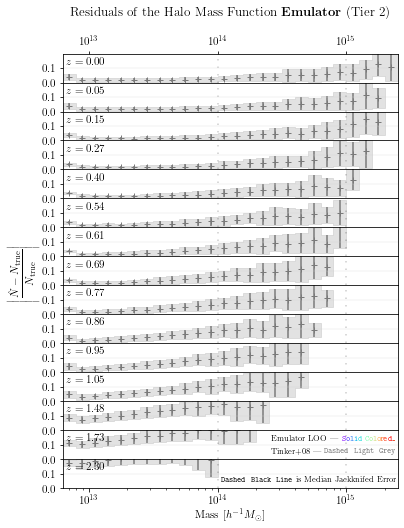

In [9]:
n_a = len(a_list)
fig, axs = plt.subplots(nrows=n_a, ncols=1, figsize=(6,8), sharex=True)
fig.text(0.06, 0.5, r'$$\left|\frac{\hat N-N_{\rm true}}{N_{\rm true}} \right|$$'+'\n\n', 
         ha='center', 
         va='center', 
         rotation='vertical',
        fontsize=11)


# big_ax.set_ylabel()


import matplotlib as mpl
import matplotlib.colors as mcolors
rainbow = mpl.colormaps['rainbow'].resampled(n_a)
rainbow_list = [mcolors.rgb2hex(rainbow(i)) for i in range(rainbow.N)]
# rainbow_list = ['r' for _ in rainbow_list]
plt.subplots_adjust(wspace=0, hspace=0)
mn = 1e20
mx = -1

# axs[0].set_title(r'Comparison of \textbf{Emulator} vs. \textbf{Tinker+08} Residuals (Tier 2)' + '\n')
axs[0].set_title(r'Residuals of the Halo Mass Function \textbf{Emulator} (Tier 2)' + '\n')

axs[0].tick_params(top=True, labeltop=True)
axs[-1].set_xlabel(r'Mass $[h^{-1}M_\odot]$')

for i, ax in enumerate(axs):
    for errors,ccolor in zip([errors_tinker], ['0.78', rainbow_list[i] ]):
        a = a_list[i]


        edges = []
        y = []
        shot_noise = []
        yerr = []
        for bins in sorted(errors[a]):
            if(bins[1]-bins[0] > 0.15): #ignore adaptive bins
                continue
            if(len(errors[a][bins])<=3): 
                continue
            if(bins[0]< mn):
                mn = bins[0]
            if(bins[1] > mx):
                mx = bins[1]
            if(bins[0] not in edges):
                edges+=[(bins[0])]
            if(bins[1] not in edges):
                edges+=[(bins[1])]
            y += [np.mean(errors[a][bins])]
            shot_noise += [np.median(shots_emulator[a][bins])]
            yerr += [np.std(errors[a][bins])]


        edge_centers = [1/2*(a+b) for a,b in zip(edges, edges[1:])]
        edges = 10**np.array(edges)
        edge_centers = 10**np.array(edge_centers)

        if(ccolor == '0.78'):
            ax.errorbar(x=edge_centers, y=y, yerr = yerr, marker='+', color='%.2f'%(eval(ccolor)-0.3), ls='none')

        else:
            
            ax.step(edges, y+[y[-1]], where='post', linewidth=1, c=ccolor)
            ax.errorbar(x=edge_centers, y=y, yerr = yerr, marker='+', color=ccolor, ls='none')
            ax.step(edges, shot_noise+[shot_noise[-1]], 'k--', where='post', linewidth=1)
            
        tmp_data = {
            'x': [],
            'y1': [],
            'y2': []}
        bin_idx = 0
        for l,r in zip(edges, edges[1:]):
            tmp_data['x'] += [l,r]
            tmp_data['y1'] += [y[bin_idx]+yerr[bin_idx], y[bin_idx]+yerr[bin_idx]]
            tmp_data['y2'] += [y[bin_idx]-yerr[bin_idx], y[bin_idx]-yerr[bin_idx]]
            bin_idx+=1

        ax.fill_between(**tmp_data,  alpha=.5, color=ccolor)

    #     ax.axvline(1e13, ls=(0,(5,20)),lw=0.3, color='k')
        ax.axvline(1e14, ls=(0,(5,20)),lw=0.3, color='k')
        ax.axvline(1e15, ls=(0,(5,20)),lw=0.3, color='k')

        ax.axhline(0.1, ls='-',lw=0.3, color='lightgrey')
    #     ax.axhline(-0.0, ls='-',lw=1, color='grey')

        ax.axhline(-0.1, ls='-',lw=0.3, color='lightgrey')

        ax.set_yticks([ -0.1,0, 0.1,])
        ax.text(.01, .9,
            s=r'$z=%.2f$'%(scaleToRedshift(a)),
            transform=ax.transAxes,
            horizontalalignment='left',
            verticalalignment='top',
                c='black',
           fontsize=11)

        ax.set_xscale('log')
        ax.set_ylim([0,0.199])
    #     ax.set_ylabel(r'$\frac{N_{\rm Fit}-N_{\rm data}}{N_{\rm data}} $')

for ax in axs:
    ax.set_xlim(10**mn, 10**mx)

    
    offset = 0.1
axs[-2].text(.62, .5 - offset,
        s=r'{Tinker+08} ---',
        transform=axs[-2].transAxes,
        horizontalalignment='left',
        verticalalignment='top',
            c='black',
       fontsize=8)
axs[-2].text(.995, .5 - offset,
        s=r'\ttfamily\lstinline{Dashed Light Grey}',
        transform=axs[-2].transAxes,
        horizontalalignment='right',
        verticalalignment='top',
            c='0.48',
       fontsize=8)


axs[-2].text(.62, .5 + offset,
        s=r'{Emulator LOO} ---',
        transform=axs[-2].transAxes,
        horizontalalignment='left',
        verticalalignment='bottom',
            c='black',
       fontsize=8)

primary = 'Solid Colored'
rainbow = mpl.colormaps['rainbow'].resampled(len(primary))
rainbow_list = [mcolors.rgb2hex(rainbow(i)) for i in range(rainbow.N)]

for i in range(len(primary)):
    tmp = (list(primary[i:]))
    for j in range(1, len(tmp)):
        tmp[j] = ' '
    tmp += ['.']
    tmp = ''.join(tmp)
    axs[-2].text(.995, .5 + offset,
        s=r'\ttfamily\lstinline{%s}'%(tmp),
        transform=axs[-2].transAxes,
        horizontalalignment='right',
        verticalalignment='bottom',
            c=rainbow_list[i],
       fontsize=8)
axs[-1].text(.995, .5 - offset,
        s=r'\texttt{Dashed Black Line} is Median Jackknifed Error',
        transform=ax.transAxes,
        horizontalalignment='right',
        verticalalignment='top',
            c='black',
       fontsize=8)

# plt.savefig('emu_vs_tinker_comparison.pdf', bbox_inches='tight')
plt.savefig('emu_performance_tier2_no_costanzi.pdf', bbox_inches='tight')
